In [ ]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
img = cv.imread("/content/drive/MyDrive/ml_project_data/potato_leaf_disease/Training/Healthy/Healthy_1.jpg")

In [ ]:
leaf_array = np.array(img)

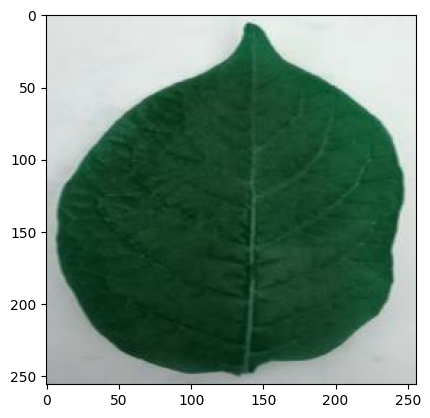

In [ ]:
plt.imshow(img)

In [ ]:
training_path=("/content/drive/MyDrive/ml_project_data/potato_leaf_disease/Training")
testing_path=("/content/drive/MyDrive/ml_project_data/potato_leaf_disease/Testing")
validation_path=("/content/drive/MyDrive/ml_project_data/potato_leaf_disease/Validation")

In [ ]:
training_folders=os.listdir(training_path)
testing_folders=os.listdir(testing_path)
validation_folders=os.listdir(validation_path)

In [ ]:
training_folders

['Early_Blight', 'Healthy', 'Late_Blight']

In [ ]:
classes=os.listdir(training_path)

In [ ]:
classes

['Early_Blight', 'Healthy', 'Late_Blight']

In [ ]:
for i in classes:
  print('training data size:',i,len(os.listdir(training_path+"/"+i)))

training data size: Early_Blight 1249
training data size: Healthy 605
training data size: Late_Blight 471


In [ ]:
for i in classes:
  print('testing data size:',i,len(os.listdir(testing_path+"/"+i)))

testing data size: Early_Blight 162
testing data size: Healthy 0
testing data size: Late_Blight 0


In [ ]:
for i in classes:
  print('testing data size:',i,len(os.listdir(validation_path+"/"+i)))

testing data size: Early_Blight 163
testing data size: Healthy 102
testing data size: Late_Blight 151


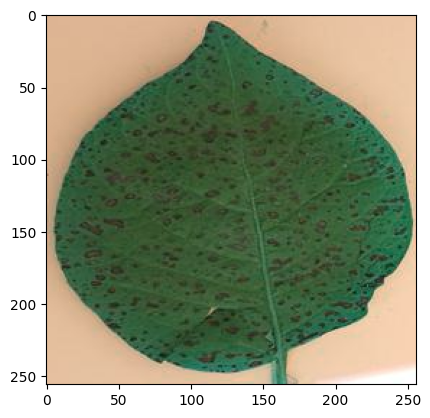

In [ ]:
img2=cv.imread("/content/drive/MyDrive/ml_project_data/potato_leaf_disease/Training/Early_Blight/Early_Blight_1.jpg")
plt.imshow(img2)

In [ ]:
img3=cv.imread("/content/drive/MyDrive/ml_project_data/potato_leaf_disease/Training/Late_Blight/Late_Blight_1.jpg")
plt.imshow(img3)

In [ ]:
img4=cv.imread("/content/drive/MyDrive/ml_project_data/potato_leaf_disease/Training/Healthy/Healthy_1.jpg")
plt.imshow(img4)

In [ ]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNEL=3

In [ ]:
testing_dataset = keras.preprocessing.image_dataset_from_directory(testing_path,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE)
)

In [ ]:
training_dataset = keras.preprocessing.image_dataset_from_directory(training_path,shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE)
)

In [ ]:
validation_dataset = keras.preprocessing.image_dataset_from_directory(validation_path,shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE)
)

In [ ]:
for image_for_predict, label_for_predict in testing_dataset.take(1):
  image_for_predict_np=image_for_predict.numpy().astype('uint8')
  label_for_predict_np=label_for_predict.numpy()

In [ ]:
classes=training_dataset.class_names
classes


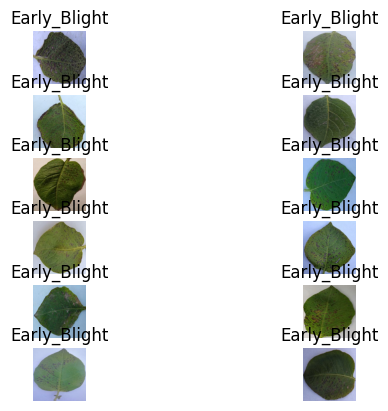

In [ ]:
for image_batch,label_batch in testing_dataset.take(1):
  for i in range(12):
    plt.subplot(6,2,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(classes[label_batch[i].numpy()])
    plt.axis('off')


In [ ]:
def myfunction(dataset):
  for image_batch, label_batch in dataset.take(1):
    plt.figure(figsize=(8,8))
    for i in range(12):
      plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype('uint8'))
      plt.title(classes[label_batch[i].numpy()])
      plt.axis("off")




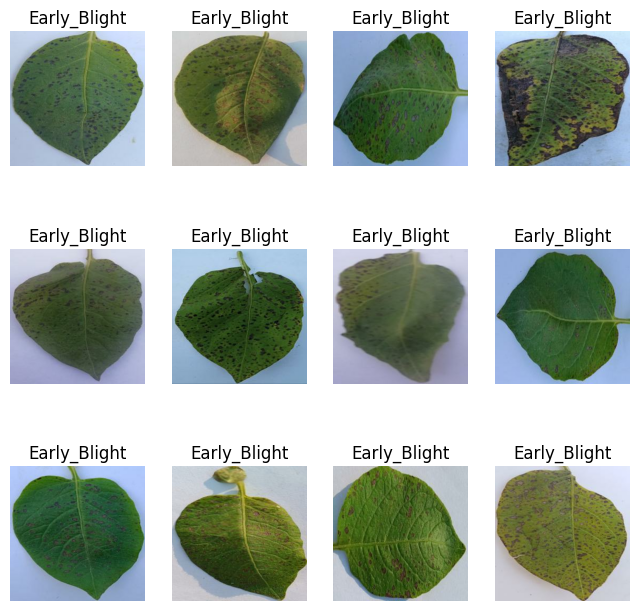

In [ ]:
myfunction(testing_dataset)

In [ ]:
#cache and prefech(CPU AND GPU)
training_dataset=training_dataset.take(3).cache().shuffle(1000).prefetch(tf.data.AUTOTUNE) #Training data changed from 10 to 3 for reduced batch size for faster computation.
validation_dataset=validation_dataset.take(3).cache().shuffle(1000).prefetch(tf.data.AUTOTUNE) #Validation data changed from 10 to 3 for reduced batch size for faster computation.
testing_dataset=testing_dataset.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Recycling and Resizing and preprocessing
resize_and_rescale= keras.Sequential([
    keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    keras.layers.experimental.preprocessing.Rescaling(1/255)
])

In [ ]:
# Data Augmentation and preprodcessing
data_augmentation=keras.Sequential([
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical")
])


In [ ]:
#bulding the model
INPUT_SHAPE=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL)

In [ ]:
#creating the model
model=keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,
    keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=INPUT_SHAPE),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu",input_shape=INPUT_SHAPE),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu",input_shape=INPUT_SHAPE),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu",input_shape=INPUT_SHAPE),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu",input_shape=INPUT_SHAPE),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu",input_shape=INPUT_SHAPE),
    keras.layers.MaxPooling2D((2,2)),

    # flattening the image
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(3,activation="softmax")
])

In [ ]:
model.build(input_shape=INPUT_SHAPE)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False
    ),
    metrics=["accuracy"]
)

In [ ]:
model.fit(training_dataset,
          batch_size=BATCH_SIZE,
          validation_data=validation_dataset,
          epochs=10
        )

In [ ]:
model.save("/content/drive/MyDrive/Classroom/deeplearing")

In [ ]:
model.save("/content/drive/MyDrive/Classroom/deeplearing/model.keras")

In [ ]:
#rb.gy/8wtz4n

In [ ]:
saved_model = keras.models.load_model("/content/drive/MyDrive/deeplearning/model2.keras")

In [ ]:
#score_array = saved_model.evaluate(testing_dataset)

In [ ]:
score_array = saved_model.predict(image_for_predict_np)

1/1 [==============================] - 0s 126ms/step


In [ ]:
for i in score_array:
  print(i)


[1.0000000e+00 2.2246713e-17 4.9954851e-10]
[9.9999750e-01 1.3457885e-10 2.4661254e-06]
[9.9999368e-01 2.3002877e-07 6.0254724e-06]
[9.9954885e-01 7.3922718e-05 3.7726536e-04]
[1.0000000e+00 2.9449644e-16 4.4256891e-09]
[1.0000000e+00 1.1104875e-19 1.4082425e-11]
[9.9999988e-01 1.8609241e-14 1.0649739e-07]
[9.9981827e-01 9.1161834e-05 9.0561851e-05]
[9.9999964e-01 1.8061943e-12 3.5909284e-07]
[9.9999845e-01 1.5157195e-11 1.5332977e-06]
[9.9999750e-01 8.6561911e-08 2.4134747e-06]
[9.9956805e-01 2.6218466e-05 4.0578438e-04]
[9.9999654e-01 5.8857148e-11 3.4803986e-06]
[9.9951184e-01 1.0309012e-06 4.8707481e-04]
[9.999999e-01 4.545099e-11 7.258129e-08]
[9.9987066e-01 8.0550075e-05 4.8744299e-05]
[9.9999988e-01 1.1274935e-11 7.5620292e-08]
[9.9999785e-01 5.5577176e-10 2.1629221e-06]
[9.9794072e-01 2.5248560e-04 1.8068639e-03]
[9.5600975e-01 4.3576438e-02 4.1375679e-04]
[1.0000000e+00 1.0633113e-19 2.1561948e-11]
[9.933554e-01 4.629343e-07 6.644190e-03]
[1.000000e+00 1.542285e-16 8.784791e-1

In [ ]:
classes[np.argmax(score_array[8])]

'Early_Blight'

In [ ]:
classes[label_for_predict_np[8]]

'Early_Blight'